# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [4]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

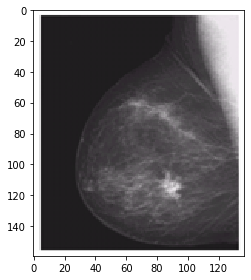

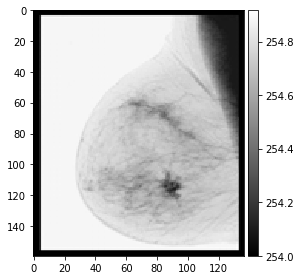

In [42]:
'''
1
Negative Transformation
'''
# Ex: imread and imshow 
mImage = io.imread('imgs/Picture1.png')
io.imshow(mImage)
io.show()
mImage=rgb2gray(mImage)
Dim=np.shape(mImage)
M=Dim[0]
N=Dim[1]
for i in range(M):
    for j in range(N):
        mImage[i][j]=255-mImage[i][j]
mImage=rgb2gray(mImage)
io.imshow(mImage,cmap="gray")
io.show()




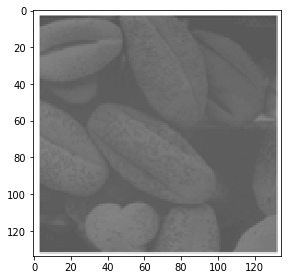

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


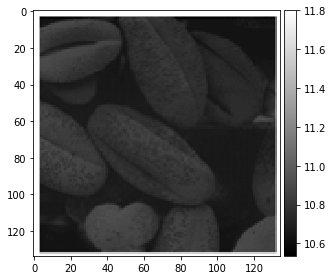

In [74]:
'''
2
Contrast Enhancement
'''
mImage = io.imread('imgs/Picture2.png')

mImage=rgb2gray(mImage)
io.imshow(mImage)
io.show()
Dim=np.shape(mImage)
M=Dim[0]
N=Dim[1]
m=1.8

for i in range(M):
    for j in range(N):
        if mImage[i][j] <= 50 :
            mImage[i][j]=m*mImage[i][j]+10
mImage=rgb2gray(mImage)
io.imshow(mImage,cmap="gray")
io.show()



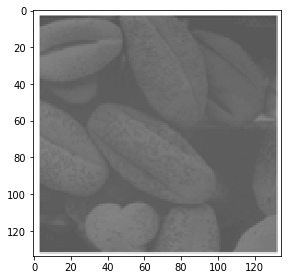

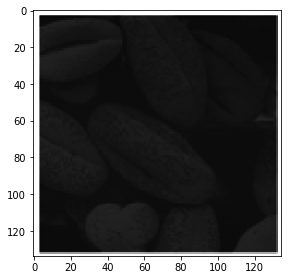

In [79]:
'''
3
Gamma Correction
'''


mImage = io.imread('imgs/Picture2.png')

mImage=rgb2gray(mImage)
io.imshow(mImage)
io.show()
Dim=np.shape(mImage)
M=Dim[0]
N=Dim[1]
mPic=mImage
c=1
gamma=3

for i in range(M):
    for j in range(N):
        mPic[i][j]=c*mImage[i][j]**gamma
mPic=rgb2gray(mPic)
io.imshow(mPic)
io.show()





[[241 252 253 ... 249 252 246]
 [254 246 249 ... 248 240 253]
 [237 168 159 ...  43  63 245]
 ...
 [248 102 106 ... 100  97 249]
 [246 108  96 ... 107 116 252]
 [252 231 252 ... 249 239 254]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 83, 1194, 744, 345, 240, 174, 120, 107, 97, 79, 55, 40, 45, 35, 38, 22, 31, 30, 34, 17, 28, 14, 21, 21, 10, 23, 21, 18, 26, 18, 17, 21, 14, 25, 19, 31, 27, 31, 30, 24, 19, 34, 30, 35, 28, 44, 37, 37, 40, 33, 41, 38, 34, 46, 53, 50, 38, 37, 53, 45, 45, 51, 48, 60, 55, 56, 59, 72, 79, 53, 55, 65, 63, 68, 69, 104, 74, 77, 81, 57, 75, 82, 73, 79, 82, 87, 70, 89, 99, 84, 81, 92, 82, 110, 81, 101, 95, 102, 85, 76, 73, 83, 88, 61, 95, 84, 75, 72, 80, 67, 79, 55, 73, 55, 54, 66, 54, 55, 59, 59, 49, 43, 48, 30, 30, 39, 29, 39, 36, 28, 39, 25, 33, 30, 26, 29, 21, 26, 22, 29, 27, 38, 34, 26, 32, 37, 27, 29, 42, 27, 47, 50, 53, 53, 58, 83, 92, 90, 85, 83, 102, 109, 91, 89, 116, 93, 112, 133, 164, 167, 161, 151, 162, 133, 140, 117, 100, 106, 100, 96, 82, 81, 93, 84, 62, 

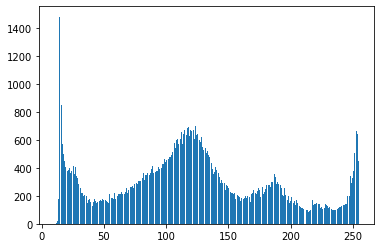

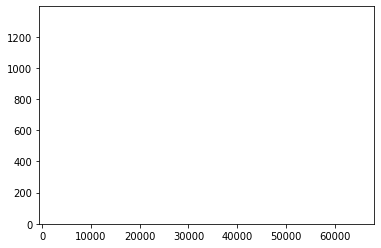

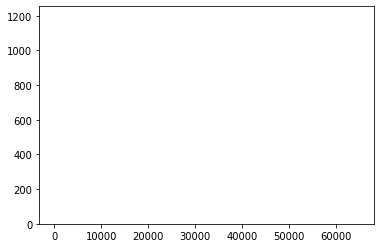

In [93]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
from skimage.exposure import histogram
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')
    
def histogramfn(image):
    HistoImg = histogram(image)
    showHist(image, HistoImg)
    #return(HistoImg[0],HistoImg[1])

output = io.imread('2.jpg')

output=rgb2gray(output)
histogramfn(output)
output = (output*255).astype(np.uint8)

histogramfn(output)
print(output)
NumberOfPixels=[]
Dim=np.shape(mImage)
for Index in range (256):
    count =0
    M=Dim[0]
    N=Dim[1]
    for i in range(M):
        for j in range(N):
            if output[i][j] == Index :
                count=count+1
    NumberOfPixels.append(count)
SumOfPixels=sum(NumberOfPixels)
print(NumberOfPixels)
print(SumOfPixels)
AccumlativeProb=[]
NewPixelValue=[]
maxGrayLevel=255
for i in range(256):
    AccumlativeProb.append(sum(NumberOfPixels[0:i])/SumOfPixels)
    NewPixelValue.append((int)(AccumlativeProb[i]*(maxGrayLevel)))
print('my length:',len(NewPixelValue))
for i in range(M):
     for j in range(N):
            output[i][j]=NewPixelValue[output[i][j]]
output=rgb2gray(output)
output = (output*255).astype(np.float64)
histogramfn(output)

#def getImageWithHist(name,ext,nbins=256):
#    pass
    
